# Assignment-1 Habermans DataSet

Habermans dataset contains the study from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

There are five columns and here are the informations of each column
Age:Patient age during the time of operation
Op_year: Year of operation(Year-1900)
axil_nodes: Number ofpositive auxillary nodes detected
Survival_status:1 is Patient survived 5 years or longer and 2:Patient died with 5 years of operation

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hb = pd.read_csv("C:\\Users\\T540-02\\Desktop\\AN\\A\\habermans-survival-data-set\\haberman.csv")



In [45]:
print(hb.shape)

(305, 4)


In [46]:
print(hb.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [75]:
hb.columns =['age','op_year','axil_nodes','surv_status']

In [76]:
print(hb.columns)

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [49]:
print(hb.head(5))

   age  op_year  axil_nodes  surv_status
0   30       62           3            1
1   30       65           0            1
2   31       59           2            1
3   31       65           4            1
4   33       58          10            1


In [50]:
hb["surv_status"].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

Observations:
1)It shows clearly that dataset is imbalanced dataset on survival status class attribute 
2) There are total of 305 record of patients.



# High Level statistics of data

In [113]:
print(hb.info())
hb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age            305 non-null int64
op_year        305 non-null int64
axil_nodes     305 non-null int64
surv_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


,age,op_year,axil_nodes,surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations:
    1) Minimum age of patient is 30 years and maxmimum age of patient is 83 years with the mean of 52 years.
    2) With 50% of Patient having only 1 auxillary nodes and 75% of them having 4 nodes or less.
    

Objective:To Predict whether the patient survives more than 5 years after the year of operation.

# There are three features age,op_year and axil_nodes to predict the survival_status.
#Lets do Bivariate analysis Scatter plots , pair plot to see if the combinations of features are helpful for classification.

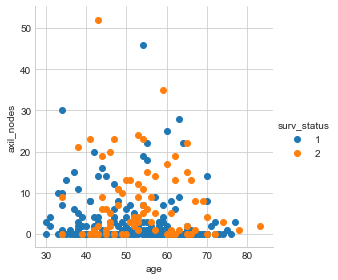

In [77]:
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="surv_status", size=4) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend(); 
plt.show();

Obervations:
1)Using Axil nodes and age we can cant distinguish survival status of the patient.

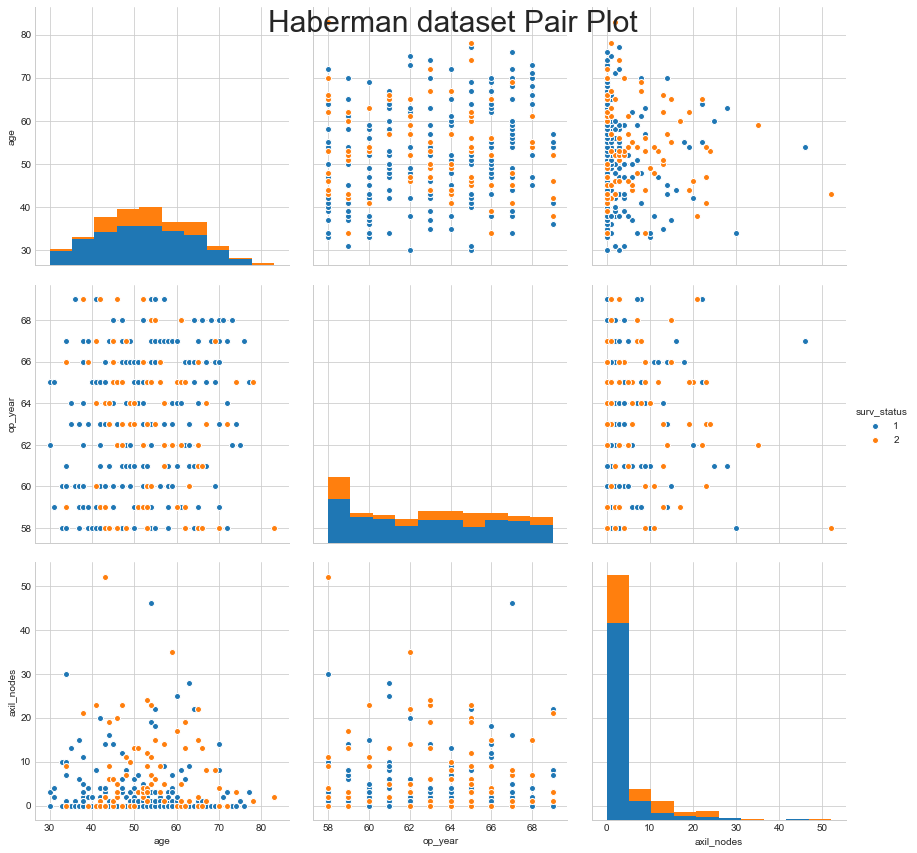

In [82]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb, hue="surv_status",x_vars=['age','op_year','axil_nodes'],y_vars=['age','op_year','axil_nodes'],size=4);
plt.suptitle("Haberman dataset Pair Plot",size=30)
plt.show()

Observations:
1)With the features age,op_year,axil nodes we cant classify because both of the classes for the survival status are almost overlapping in all the cases.
2)survival status is not linearly seperable with all the features.
3) The available features are not much useful. we should collect much useful features which can help to predict the survival of the patient.

# Univariate Analysis

 * Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


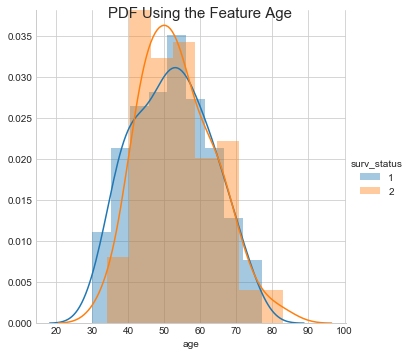

In [87]:
sns.FacetGrid(hb, hue="surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.suptitle("PDF Using the Feature Age",size=15)
plt.show();

Observations:PDF of the both the classes almost overlap and have the similar spread, 
             we cannot classify the survival status of the patient with the age feature.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


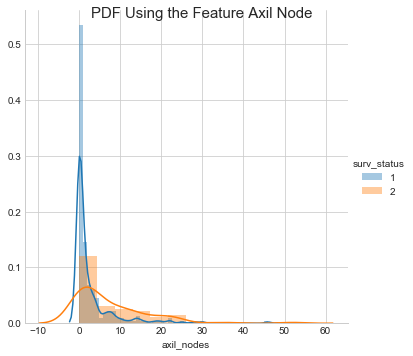

In [88]:
sns.FacetGrid(hb, hue="surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();plt.suptitle("PDF Using the Feature Axil Node",size=15)

plt.show();

Observations:PDF of the both the classes almost overlap and have the similar spread, we cannot classify the survival status of the patient with the axil_node feature also

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


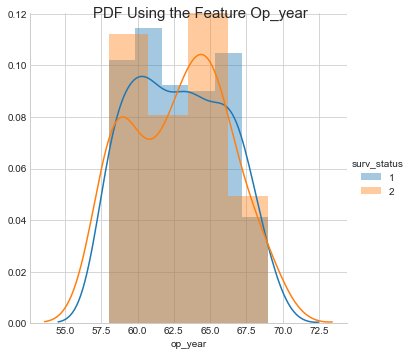

In [89]:
sns.FacetGrid(hb, hue="surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.suptitle("PDF Using the Feature Op_year",size=15)
plt.show();

Observations:PDF of the both the classes almost overlap and have the similar spread, we cannot classify the survival status of the patient with the op_year feature.

0
age
1
op_year
2
axil_nodes


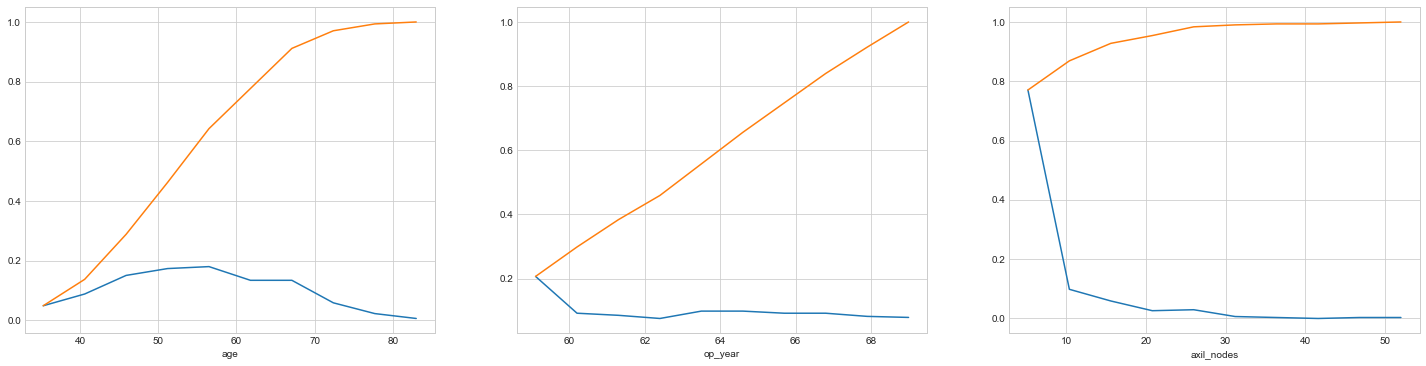

In [104]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of varaible takes the value less than or equal to x.

plt.figure(figsize=(25,6))
for i, feature in enumerate(list(hb.columns)[:-1]):
    print(i)
    print(feature)
    plt.subplot(1, 3, i+1)
    counts, bin_edges = np.histogram(hb[feature], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

Observations
1)68% of patient are below age of 60.
2)82% Patient have less than or equal to 10 axil_nodes.

# BoxPlots
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

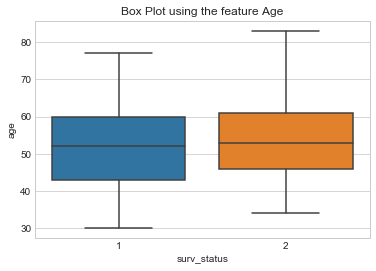

In [106]:
sns.boxplot(x="surv_status",y="age",data=hb)
plt.title("Box Plot using the feature Age")
plt.show()

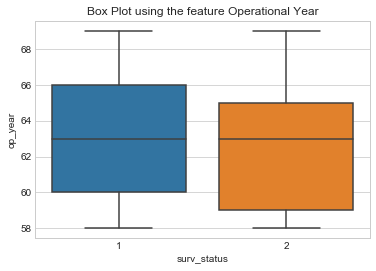

In [109]:
sns.boxplot(x="surv_status",y="op_year",data=hb)
plt.title("Box Plot using the feature Operational Year")
plt.show()

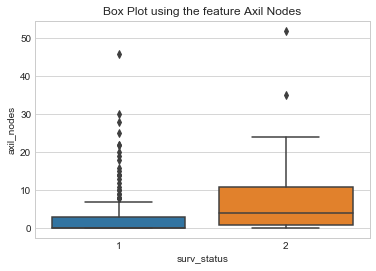

In [110]:
sns.boxplot(x="surv_status",y="axil_nodes",data=hb)
plt.title("Box Plot using the feature Axil Nodes")
plt.show()

# Volin Plots
Violin plot is the combination of box plot and probability density function

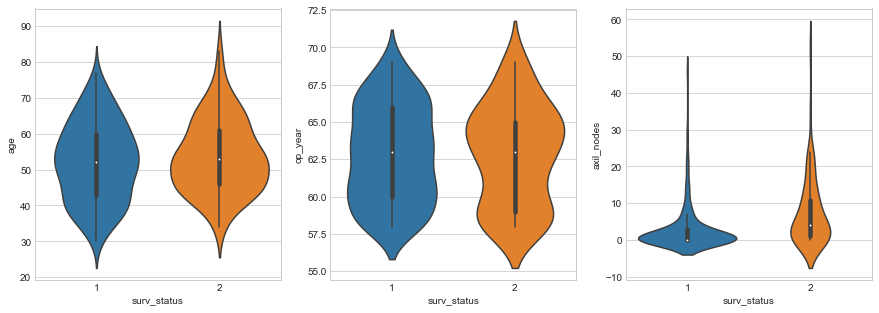

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(list(hb.columns)[:-1]):
    sns.violinplot( x='surv_status', y=feature, data=hb, ax=axes[i])
plt.show()

Observations
The number of axil nodes of the survivors is highly densed from 0 to 5.
Almost 80% of the patients have less than or equal to 5 axil nodes